# Introduction to Machine Learning

## What is Machine Learning?

Machine Learning is a subset of artificial intelligence (AI) that enables systems to learn from data and improve over time without being explicitly programmed.

In traditional programming, we write instructions to process data. In machine learning, the system learns patterns from data and makes predictions or decisions based on it.

## Types of Machine Learning

There are three main types of machine learning:
1. **Supervised Learning**: Learning from labeled data. The system is trained on a dataset that contains both the input features (X) and the expected output (Y).
2. **Unsupervised Learning**: Learning from unlabeled data. The system identifies patterns and relationships without predefined labels.
3. **Reinforcement Learning**: Learning by interacting with an environment. The system learns to make decisions based on rewards and penalties.

Let's start with a simple example of supervised learning using a popular dataset: the Iris dataset.


In [7]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Features (X) and labels (y)
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 100.00%


## Explanation of the Code

1. **Loading the Dataset**: We used the `load_iris()` function from `sklearn.datasets` to load the Iris dataset, which is a popular dataset for classification tasks. It contains 150 samples with 4 features (sepal length, sepal width, petal length, and petal width), and the goal is to classify these into three species of Iris.

2. **Train-Test Split**: We split the data into two parts—70% for training and 30% for testing. This is important to evaluate the model's performance on unseen data.

3. **Random Forest Classifier**: We used a Random Forest classifier, which is an ensemble method that combines multiple decision trees to improve prediction accuracy.

4. **Training the Model**: The model is trained on the training set using the `.fit()` method.

5. **Making Predictions**: The trained model makes predictions on the test set using `.predict()`.

6. **Evaluating the Model**: Finally, we evaluate the accuracy of the model by comparing the predicted labels to the actual labels using `accuracy_score()`.

## Key Takeaways

- Machine Learning models require data to learn patterns and relationships.
- In **Supervised Learning**, we provide labeled data to the model.
- The **Train-Test Split** is crucial for evaluating model performance.

Next, we will explore more advanced topics like model evaluation, hyperparameter tuning, and real-world applications in future lessons.


### 1. Exploratory Data Analysis (EDA)

Before training a machine learning model, it's good practice to explore the data. We’ll use `pandas` and `matplotlib` to get some basic insights about the Iris dataset.


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

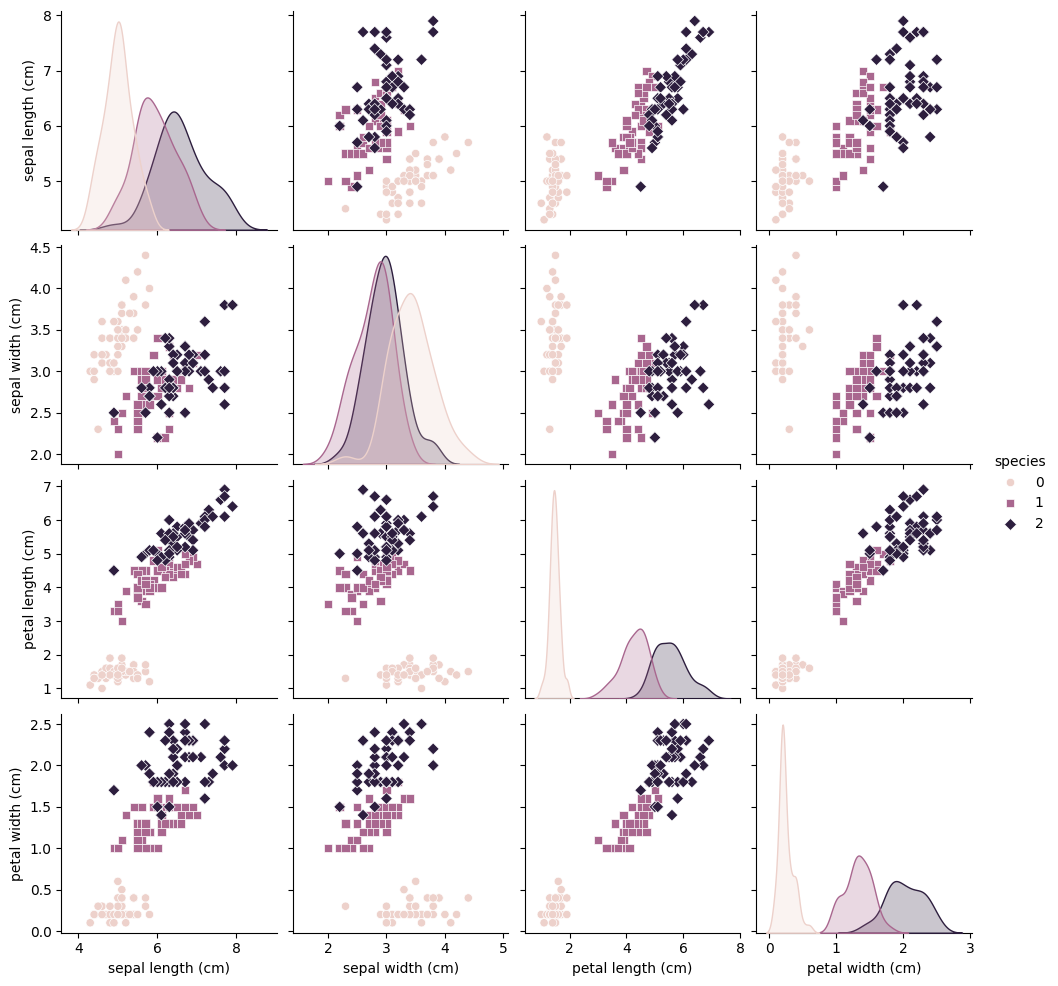

In [8]:
# Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset into a DataFrame for easier manipulation
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Show the first few rows of the dataset
print(iris_df.head())

# Check basic statistics
print(iris_df.describe())

# Pairplot for visualizing relationships
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()


### 3. Feature Importance

Random Forest provides a feature importance metric, which tells us how much each feature contributes to the decision-making process.


Feature ranking:
1. petal length (cm) (0.4705)
2. petal width (cm) (0.3849)
3. sepal length (cm) (0.0996)
4. sepal width (cm) (0.0450)


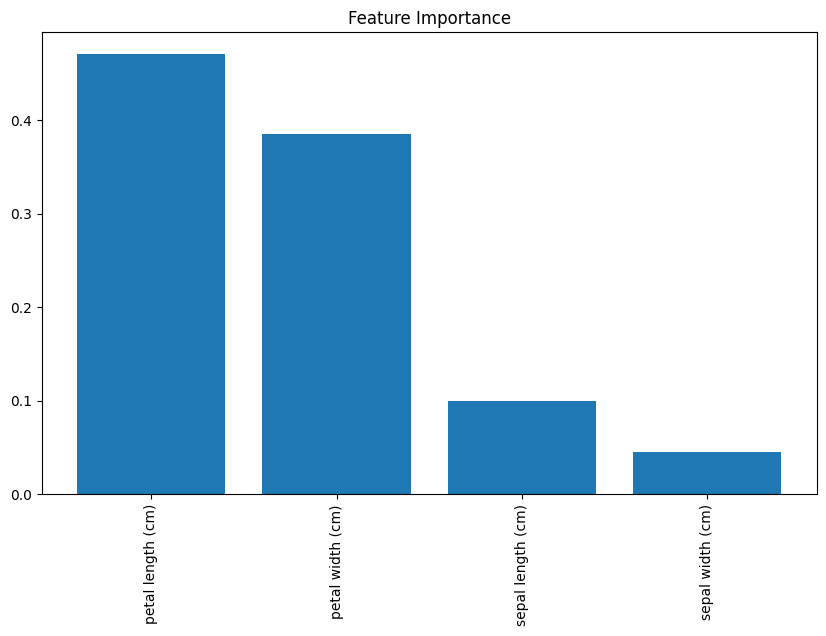

In [9]:
# After training the model
# Feature importance analysis
import numpy as np

# Get feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i + 1}. {iris.feature_names[indices[i]]} ({importances[indices[i]]:.4f})")

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices], rotation=90)
plt.show()


### 4. Confusion Matrix

To get a better sense of how well our model is performing, we can plot a confusion matrix to visualize the breakdown of correct and incorrect classifications.


## Explanation of the Confusion Matrix

The image shows a **Confusion Matrix** for a classification model. Below is a detailed interpretation:

### **What is a Confusion Matrix?**
A confusion matrix is a summary of prediction results on a classification problem. It shows the number of correct and incorrect predictions made by the model compared to the actual labels in the test data. The matrix is arranged in such a way that:
- **Rows**: Represent the actual classes (true labels).
- **Columns**: Represent the predicted classes.

### **Understanding the Confusion Matrix**
The matrix has three classes representing three species of the Iris dataset:
1. **Setosa**
2. **Versicolor**
3. **Virginica**

Each entry in the confusion matrix corresponds to:
- **Rows (y-axis)**: The true labels (actual species).
- **Columns (x-axis)**: The predicted labels (model predictions).

The diagonal values represent correct predictions (where the true label matches the predicted label). Off-diagonal values represent misclassifications (where the model's prediction was incorrect).

#### **Matrix Breakdown**
- **Top-left (Setosa-Setosa)**: The model predicted **Setosa** correctly for 19 instances.
- **Middle-middle (Versicolor-Versicolor)**: The model predicted **Versicolor** correctly for 13 instances.
- **Bottom-right (Virginica-Virginica)**: The model predicted **Virginica** correctly for 13 instances.
- **Off-diagonal elements (all zeroes)**: There are no misclassifications. For example, the model never predicted Setosa as Versicolor or Virginica, and vice versa.

### **Key Takeaways**
- The model's predictions are **perfect** for this dataset, as evidenced by the fact that all off-diagonal elements are zero, meaning there are no errors or misclassifications.
- The diagonal elements show that all instances of Setosa, Versicolor, and Virginica have been classified correctly.

This is an ideal scenario where the classifier has achieved **100% accuracy** on this test data.


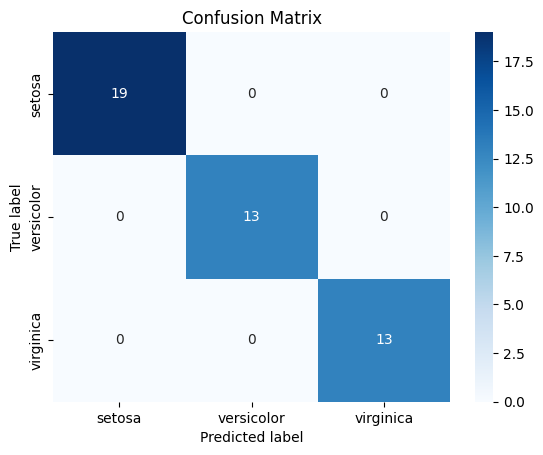

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


### 5. Visualizing Predictions (Optional)

We can further visualize how the predictions distribute using a scatter plot that compares true and predicted labels.


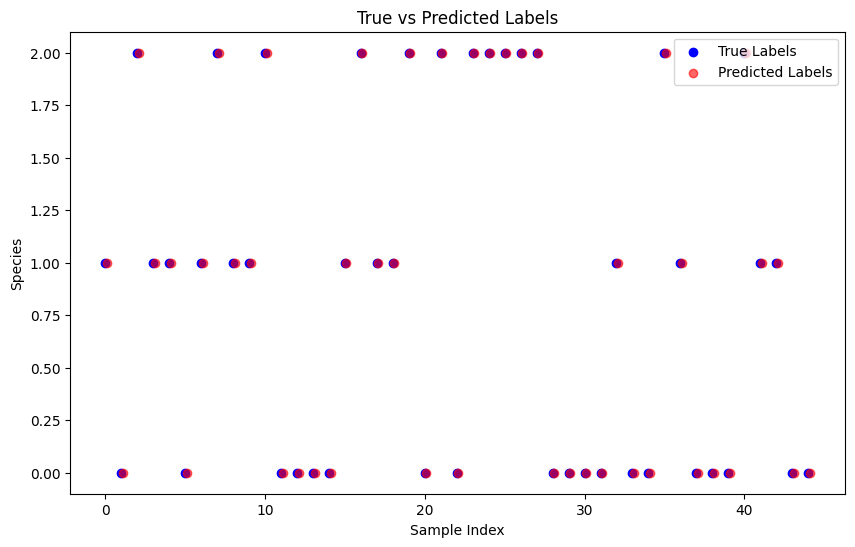

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
# You can use this code snippet for visualization.

# Visualizing true vs predicted species
plt.figure(figsize=(10, 6))

# Plotting true labels
plt.scatter(range(len(y_test)), y_test, color="blue", label="True Labels")

# Option 1: Increase Transparency for Predicted Labels
# plt.scatter(range(len(y_test)), y_pred, color="red", label="Predicted Labels", alpha=0.3)

# Option 2: Add slight offset to make the points visible
plt.scatter([i + 0.1 for i in range(len(y_test))], y_pred, color="red", label="Predicted Labels", alpha=0.6)

# Adding labels and title
plt.title("True vs Predicted Labels")
plt.xlabel("Sample Index")
plt.ylabel("Species")

# Add a legend
plt.legend()

# Show the plot
plt.show()
